# Extracting features from data

Module 1, Lab 1<br>



In [ ]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [5]:
topic1 = 'Girraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [6]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. \nIls correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparaît dans de nombreuses cultures. Il est symbole de sagesse en Asie et est  connu pour sa mémoire et 

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [7]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [8]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [9]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapitraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspecieswithsevensubspecieswhichcanbedistinguishedmorphologicallybytheirfurcoatpatternssixvalidextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesandtheirof

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [10]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

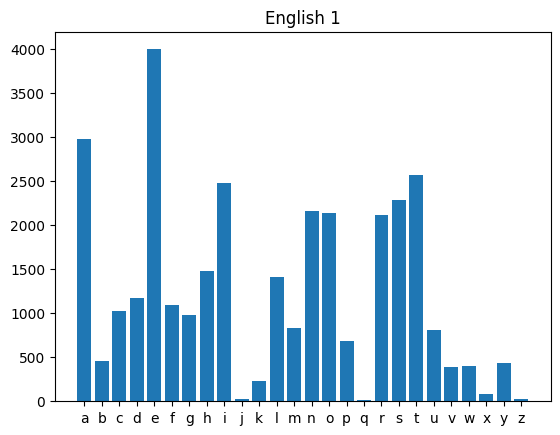

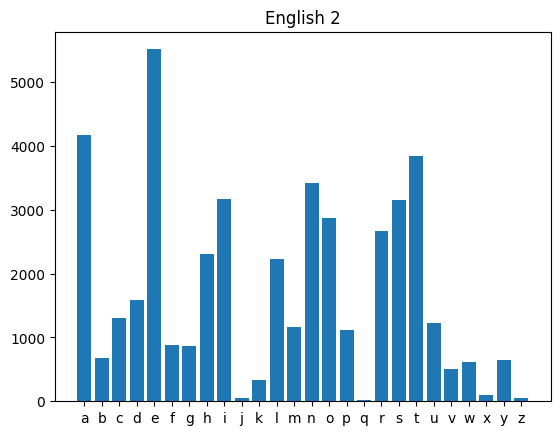

In [11]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

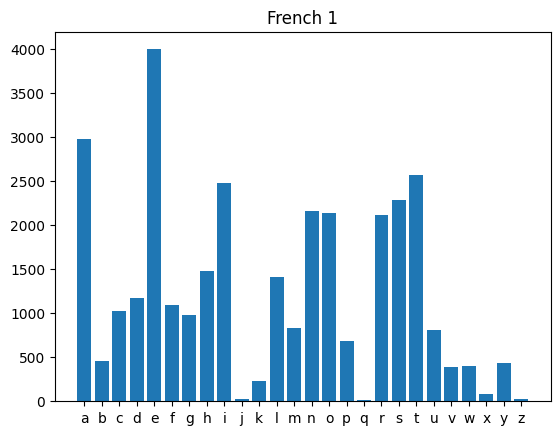

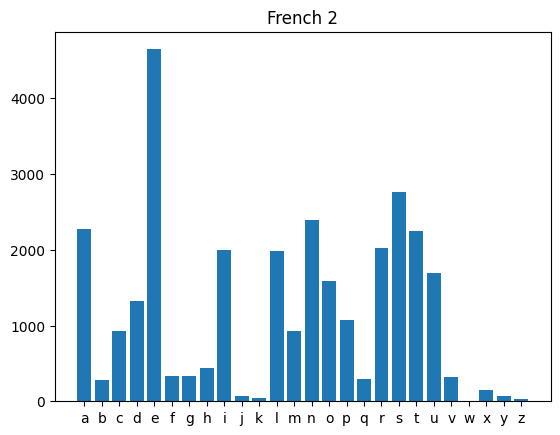

In [12]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

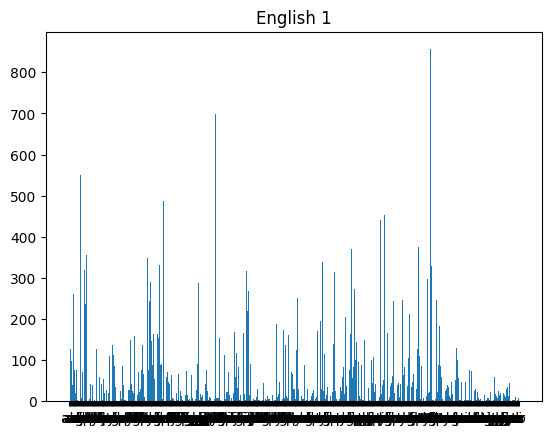

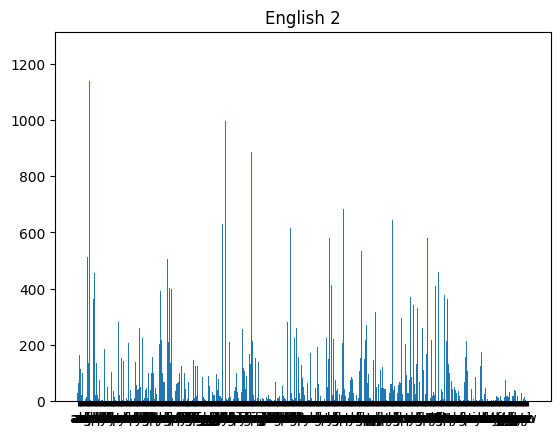

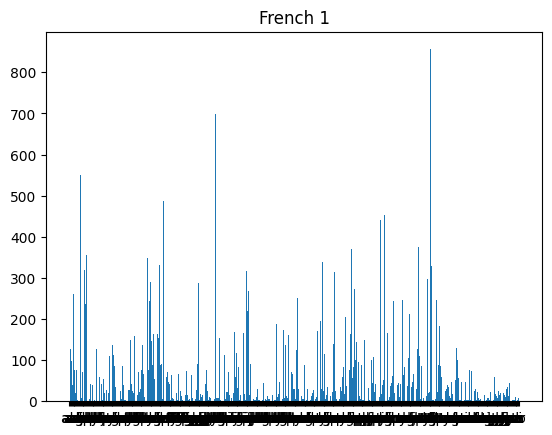

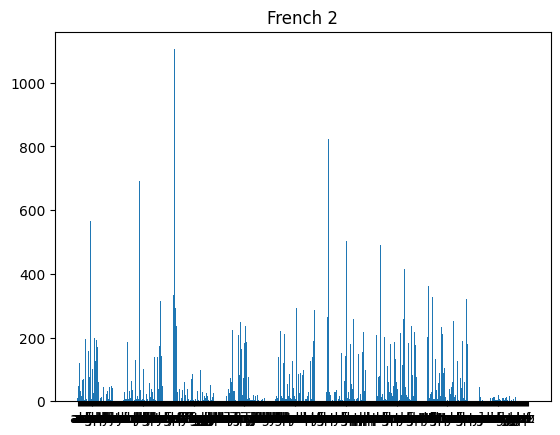

In [13]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [14]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

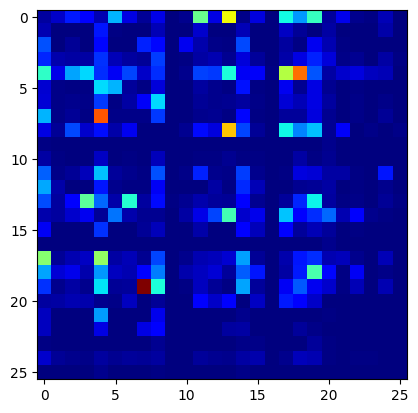

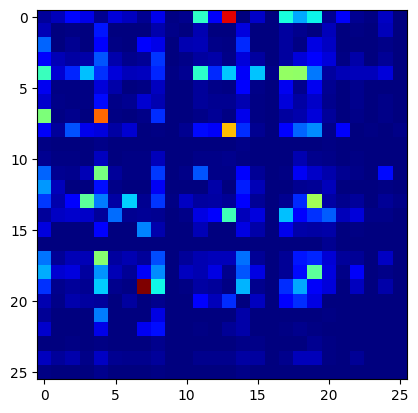

In [15]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

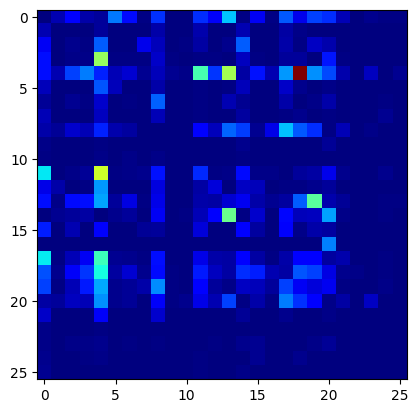

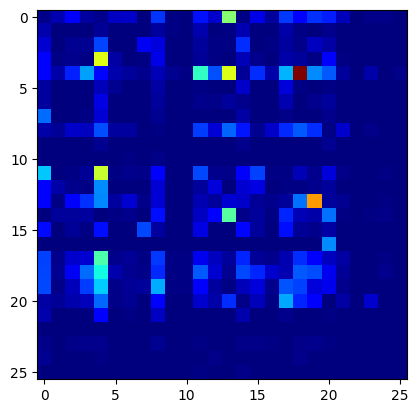

In [16]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [17]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [18]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 856.0
('h', 'e') : 699.0
('e', 's') : 677.0
('i', 'n') : 601.0
('a', 'n') : 550.0
('e', 'r') : 486.0
('r', 'e') : 452.0
('r', 'a') : 440.0
('a', 'l') : 408.0
('n', 'd') : 397.0

English 2:
('t', 'h') : 1251.0
('a', 'n') : 1139.0
('h', 'e') : 997.0
('i', 'n') : 885.0
('n', 't') : 683.0
('e', 'r') : 662.0
('e', 's') : 656.0
('r', 'e') : 644.0
('h', 'a') : 629.0
('l', 'e') : 616.0

French 1:
('e', 's') : 789.0
('l', 'e') : 473.0
('e', 'n') : 434.0
('d', 'e') : 420.0
('o', 'n') : 379.0
('n', 't') : 362.0
('e', 'l') : 345.0
('r', 'e') : 334.0
('s', 'e') : 296.0
('r', 'a') : 281.0

French 2:
('e', 's') : 1105.0
('n', 't') : 823.0
('d', 'e') : 690.0
('e', 'n') : 686.0
('l', 'e') : 652.0
('a', 'n') : 566.0
('o', 'n') : 504.0
('r', 'e') : 492.0
('e', 'l') : 456.0
('s', 'e') : 414.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [19]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [20]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

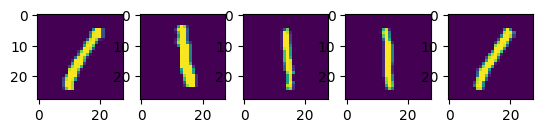

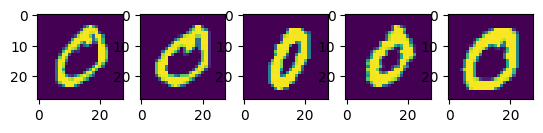

In [21]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [22]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

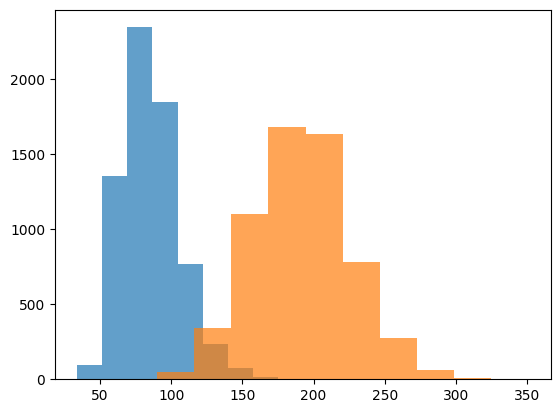

In [23]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [24]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

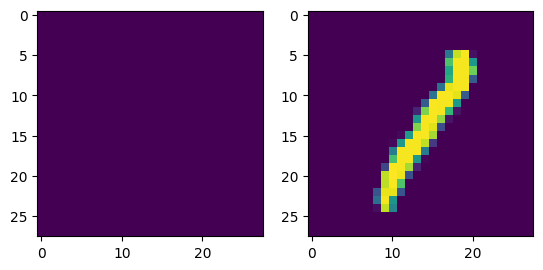

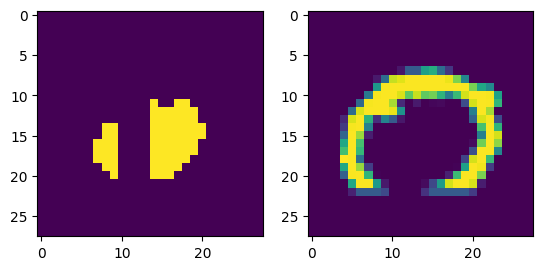

In [25]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

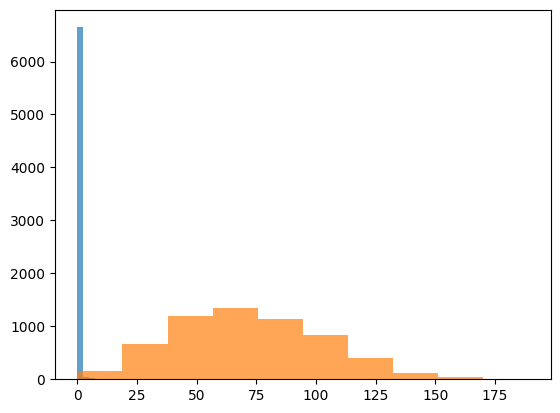

In [26]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [27]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

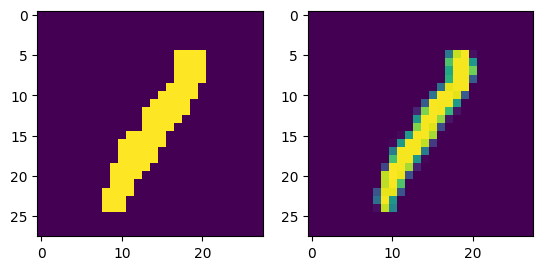

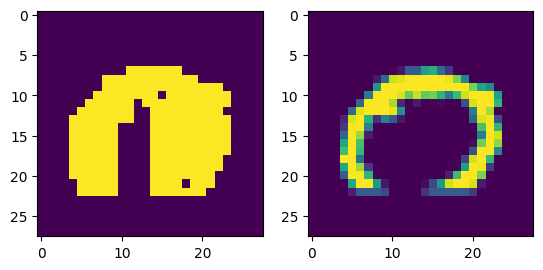

In [28]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

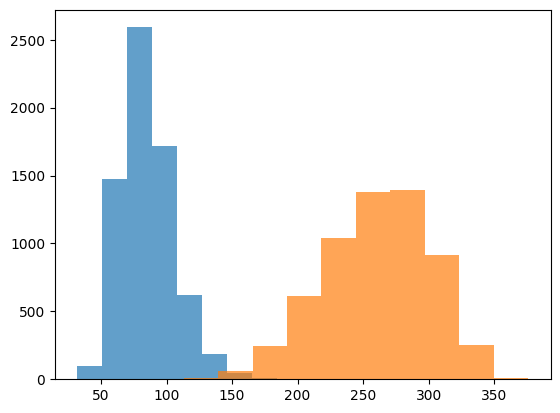

In [29]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [30]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

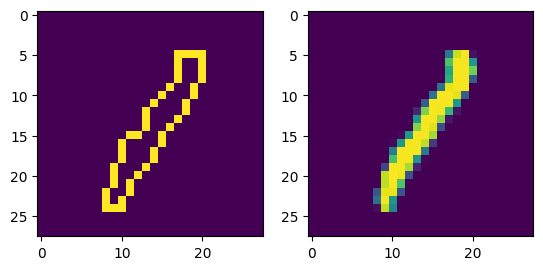

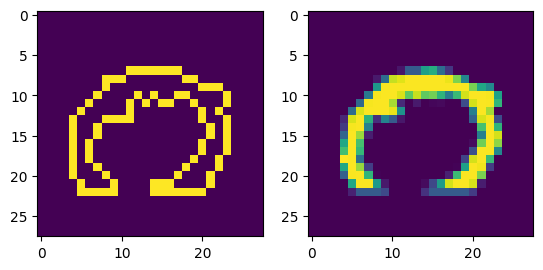

In [31]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

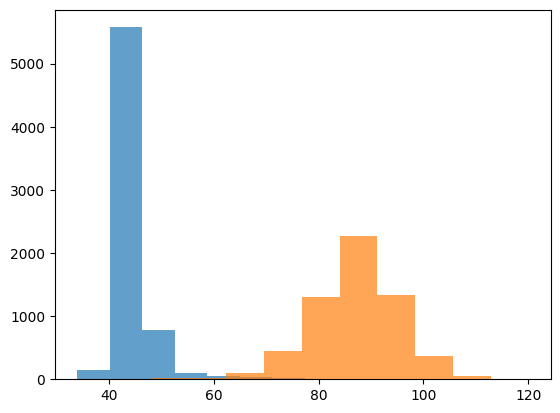

In [32]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

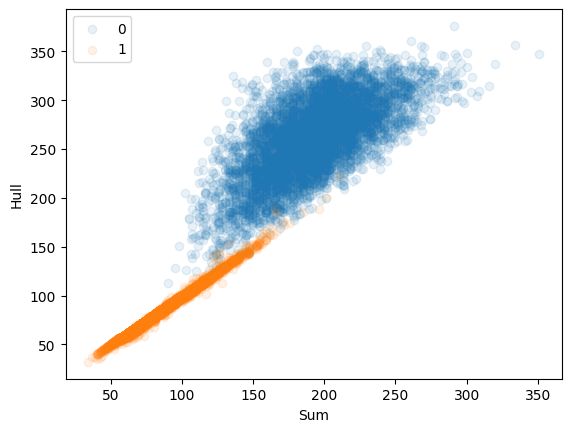

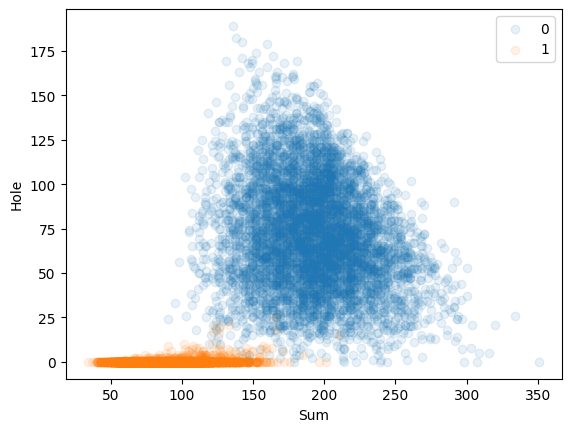

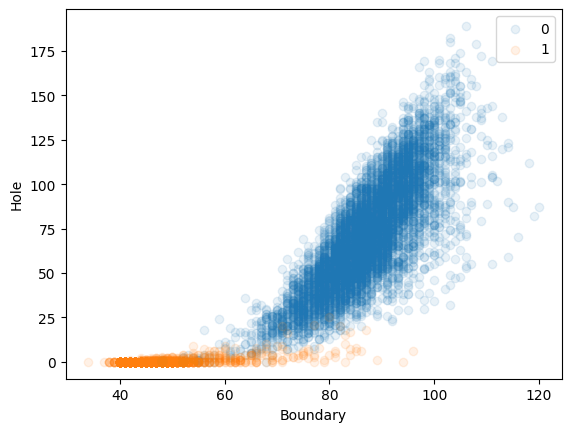

In [33]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [34]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

# Exploring the Questions from Part 1

Let's explore the questions raised in Part 1 about text features and n-grams.

## Question 1: Try with different languages

Let's explore how n-gram features work with different language pairs. We'll compare English with Spanish and German instead of French.

In [ ]:
# Let's get the same topics in Spanish and German
wikipedia.set_lang('es')  # Spanish
try:
    sp1 = wikipedia.page(topic1).content
    sp2 = wikipedia.page(topic2).content
except:
    # Fallback to search if exact page not found
    sp1 = wikipedia.page(wikipedia.search(topic1)[0]).content
    sp2 = wikipedia.page(wikipedia.search(topic2)[0]).content

wikipedia.set_lang('de')  # German
try:
    de1 = wikipedia.page(topic1).content
    de2 = wikipedia.page(topic2).content
except:
    de1 = wikipedia.page(wikipedia.search(topic1)[0]).content
    de2 = wikipedia.page(wikipedia.search(topic2)[0]).content

# Clean up the text
sp1 = cleanup(sp1)
sp2 = cleanup(sp2)
de1 = cleanup(de1)
de2 = cleanup(de2)

print(f"Text lengths - Spanish: {len(sp1)}, {len(sp2)}")
print(f"Text lengths - German: {len(de1)}, {len(de2)}")

In [ ]:
# Compare bigrams across different languages
bigram_sp1 = Counter(ngrams(sp1, 2))
bigram_de1 = Counter(ngrams(de1, 2))

# Create a comparative visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Helper function for plotting bigram heatmaps
def plotbihistogram_ax(ngram, ax, title):
    freq = np.zeros((26,26))
    for ii in range(26):
        for jj in range(26):
            freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
    im = ax.imshow(freq, cmap='jet')
    ax.set_title(title)
    ax.set_xlabel('Second character')
    ax.set_ylabel('First character')
    return freq

plotbihistogram_ax(bigram_eng1, axes[0,0], 'English')
plotbihistogram_ax(bigram_fr1, axes[0,1], 'French')
plotbihistogram_ax(bigram_sp1, axes[1,0], 'Spanish')
plotbihistogram_ax(bigram_de1, axes[1,1], 'German')

plt.tight_layout()
plt.show()

# Show top bigrams for each language
print("Top 5 bigrams by language:")
print("\nEnglish:", [tuple2string(k) for k, v in bigram_eng1.most_common(5)])
print("French:", [tuple2string(k) for k, v in bigram_fr1.most_common(5)])
print("Spanish:", [tuple2string(k) for k, v in bigram_sp1.most_common(5)])
print("German:", [tuple2string(k) for k, v in bigram_de1.most_common(5)])

## Question 2: Very different topics and different sources

Let's compare very different topics (e.g., "Mathematics" vs "Pizza") and also try text from different sources.

In [ ]:
# Try very different topics
different_topics = ['Mathematics', 'Pizza']

wikipedia.set_lang('en')
try:
    math_content = wikipedia.page(different_topics[0]).content
    pizza_content = wikipedia.page(different_topics[1]).content
except:
    math_content = wikipedia.page(wikipedia.search(different_topics[0])[0]).content
    pizza_content = wikipedia.page(wikipedia.search(different_topics[1])[0]).content

# Clean the content
math_clean = cleanup(math_content)
pizza_clean = cleanup(pizza_content)

# Calculate bigrams for different topics
bigram_math = Counter(ngrams(math_clean, 2))
bigram_pizza = Counter(ngrams(pizza_clean, 2))

# Compare with our original similar topics (giraffe vs elephant)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plotbihistogram_ax(bigram_eng1, axes[0,0], 'Giraffe (Original)')
plotbihistogram_ax(bigram_eng2, axes[0,1], 'Elephant (Original)')
plotbihistogram_ax(bigram_math, axes[1,0], 'Mathematics (Very Different)')
plotbihistogram_ax(bigram_pizza, axes[1,1], 'Pizza (Very Different)')

plt.tight_layout()
plt.show()

print("Comparison of topic similarity:")
print("Similar topics (Giraffe vs Elephant) - Top 5 bigrams:")
print("Giraffe:", [tuple2string(k) for k, v in bigram_eng1.most_common(5)])
print("Elephant:", [tuple2string(k) for k, v in bigram_eng2.most_common(5)])

print("\nVery different topics (Math vs Pizza) - Top 5 bigrams:")
print("Mathematics:", [tuple2string(k) for k, v in bigram_math.most_common(5)])
print("Pizza:", [tuple2string(k) for k, v in bigram_pizza.most_common(5)])

In [ ]:
# Let's also try text from a different source - create some sample texts
literary_text = """
It was the best of times, it was the worst of times, it was the age of wisdom, 
it was the age of foolishness, it was the epoch of belief, it was the epoch of 
incredulity, it was the season of Light, it was the season of Darkness, it was 
the spring of hope, it was the winter of despair.
""" * 10  # Repeat to get more text

technical_text = """
The algorithm complexity is O(n log n) where n represents the input size. 
We utilize dynamic programming techniques to optimize the recursive function calls.
Big O notation describes the performance characteristics of algorithms in computer science.
Hash tables provide constant time lookup operations on average case scenarios.
""" * 10  # Repeat to get more text

# Clean the texts
literary_clean = cleanup(literary_text)
technical_clean = cleanup(technical_text)

# Calculate bigrams
bigram_literary = Counter(ngrams(literary_clean, 2))
bigram_technical = Counter(ngrams(technical_clean, 2))

# Compare different text sources
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

plotbihistogram_ax(bigram_eng1, axes[0,0], 'Wikipedia (Giraffe)')
plotbihistogram_ax(bigram_math, axes[0,1], 'Wikipedia (Mathematics)')
plotbihistogram_ax(bigram_literary, axes[1,0], 'Literary Text')
plotbihistogram_ax(bigram_technical, axes[1,1], 'Technical Text')

plt.tight_layout()
plt.show()

print("Comparison across different text sources:")
print("Wikipedia:", [tuple2string(k) for k, v in bigram_eng1.most_common(5)])
print("Literary:", [tuple2string(k) for k, v in bigram_literary.most_common(5)])
print("Technical:", [tuple2string(k) for k, v in bigram_technical.most_common(5)])

## Question 3: Trigrams and higher n-grams

Let's explore trigrams (3-character sequences) and higher n-grams, and create effective visualizations for them.

In [ ]:
# Calculate trigrams for English and French
trigram_eng1 = Counter(ngrams(eng1, 3))
trigram_fr1 = Counter(ngrams(fr1, 3))

# For trigrams, 3D visualization is impractical (26^3 = 17,576 combinations)
# Instead, let's show top trigrams and use other visualization methods

print("Top 10 trigrams by language:")
print("\nEnglish trigrams:")
for trigram, count in trigram_eng1.most_common(10):
    print(f"'{tuple2string(trigram)}': {count}")

print("\nFrench trigrams:")
for trigram, count in trigram_fr1.most_common(10):
    print(f"'{tuple2string(trigram)}': {count}")

# Alternative visualization: Show frequency distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Get top 20 trigrams for each language
eng_trigrams = [tuple2string(k) for k, v in trigram_eng1.most_common(20)]
eng_counts = [v for k, v in trigram_eng1.most_common(20)]

fr_trigrams = [tuple2string(k) for k, v in trigram_fr1.most_common(20)]
fr_counts = [v for k, v in trigram_fr1.most_common(20)]

ax1.bar(range(len(eng_trigrams)), eng_counts)
ax1.set_title('Top 20 English Trigrams')
ax1.set_xlabel('Trigram Rank')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', labelsize=8)

ax2.bar(range(len(fr_trigrams)), fr_counts)
ax2.set_title('Top 20 French Trigrams')
ax2.set_xlabel('Trigram Rank')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Let's try 4-grams and 5-grams too
fourgram_eng1 = Counter(ngrams(eng1, 4))
fourgram_fr1 = Counter(ngrams(fr1, 4))

fivegram_eng1 = Counter(ngrams(eng1, 5))
fivegram_fr1 = Counter(ngrams(fr1, 5))

print("Comparison of n-gram distinctiveness between English and French:")
print("="*60)

# Function to show language discrimination power
def language_discrimination_power(ngram_dict1, ngram_dict2, lang1, lang2, n):
    """Show how well n-grams distinguish between two languages"""
    common_keys = set(ngram_dict1.keys()) & set(ngram_dict2.keys())
    unique_to_1 = len(set(ngram_dict1.keys()) - set(ngram_dict2.keys()))
    unique_to_2 = len(set(ngram_dict2.keys()) - set(ngram_dict1.keys()))
    
    print(f"\n{n}-grams:")
    print(f"Common {n}-grams: {len(common_keys)}")
    print(f"Unique to {lang1}: {unique_to_1}")
    print(f"Unique to {lang2}: {unique_to_2}")
    print(f"Discrimination ratio: {(unique_to_1 + unique_to_2) / (len(common_keys) + 1):.2f}")

language_discrimination_power(bigram_eng1, bigram_fr1, "English", "French", 2)
language_discrimination_power(trigram_eng1, trigram_fr1, "English", "French", 3)
language_discrimination_power(fourgram_eng1, fourgram_fr1, "English", "French", 4)
language_discrimination_power(fivegram_eng1, fivegram_fr1, "English", "French", 5)

# Exploring the Questions from Part 2

Let's explore the questions raised in Part 2 about image features and classification.

## Question 1: Which is the best combination of features?

Let's evaluate different feature combinations by measuring how well they separate the classes.

In [ ]:
# Let's measure class separability using different metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Create feature combinations
features_dict = {
    'Sum': (sum0, sum1),
    'Hull': (hull0, hull1),
    'Hole': (hole0, hole1),
    'Boundary': (bound0, bound1)
}

# Function to calculate class separation metrics
def calculate_separation_metrics(class0_data, class1_data, feature_name):
    """Calculate various metrics to measure how well features separate classes"""
    
    # Combine data and create labels
    combined_data = np.concatenate([class0_data, class1_data])
    labels = np.concatenate([np.zeros(len(class0_data)), np.ones(len(class1_data))])
    
    # Reshape for sklearn (needs 2D array)
    combined_data = combined_data.reshape(-1, 1)
    
    # Calculate metrics
    mean_0 = np.mean(class0_data)
    mean_1 = np.mean(class1_data)
    std_0 = np.std(class0_data)
    std_1 = np.std(class1_data)
    
    # Distance between means
    mean_distance = abs(mean_1 - mean_0)
    
    # Normalized distance (Cohen's d - effect size)
    pooled_std = np.sqrt((std_0**2 + std_1**2) / 2)
    cohens_d = mean_distance / pooled_std if pooled_std > 0 else 0
    
    # Overlap percentage (approximate)
    overlap = max(0, min(mean_0 + 2*std_0, mean_1 + 2*std_1) - max(mean_0 - 2*std_0, mean_1 - 2*std_1))
    total_range = max(mean_0 + 2*std_0, mean_1 + 2*std_1) - min(mean_0 - 2*std_0, mean_1 - 2*std_1)
    overlap_percentage = (overlap / total_range) * 100 if total_range > 0 else 100
    
    return {
        'feature': feature_name,
        'mean_distance': mean_distance,
        'cohens_d': cohens_d,
        'overlap_percentage': overlap_percentage,
        'class0_mean': mean_0,
        'class1_mean': mean_1,
        'class0_std': std_0,
        'class1_std': std_1
    }

# Evaluate individual features
print("Individual Feature Performance:")
print("="*60)
results = []

for feature_name, (class0_data, class1_data) in features_dict.items():
    metrics = calculate_separation_metrics(class0_data, class1_data, feature_name)
    results.append(metrics)
    
    print(f"\n{feature_name}:")
    print(f"  Mean distance: {metrics['mean_distance']:.2f}")
    print(f"  Cohen's d (effect size): {metrics['cohens_d']:.2f}")
    print(f"  Overlap percentage: {metrics['overlap_percentage']:.1f}%")
    print(f"  Class 0 mean±std: {metrics['class0_mean']:.1f}±{metrics['class0_std']:.1f}")
    print(f"  Class 1 mean±std: {metrics['class1_mean']:.1f}±{metrics['class1_std']:.1f}")

# Sort by Cohen's d (best separation)
results.sort(key=lambda x: x['cohens_d'], reverse=True)
print(f"\nBest individual features (by Cohen's d):")
for i, result in enumerate(results, 1):
    print(f"{i}. {result['feature']} (Cohen's d = {result['cohens_d']:.2f})")

In [ ]:
# Now let's test feature combinations
from itertools import combinations

# Test all 2-feature combinations
feature_names = list(features_dict.keys())
feature_data = list(features_dict.values())

print("\nTwo-Feature Combinations:")
print("="*40)

combination_results = []

for i, j in combinations(range(len(feature_names)), 2):
    name1, name2 = feature_names[i], feature_names[j]
    (data0_1, data1_1), (data0_2, data1_2) = feature_data[i], feature_data[j]
    
    # Create 2D feature vectors
    features_0 = np.column_stack([data0_1, data0_2])
    features_1 = np.column_stack([data1_1, data1_2])
    
    # Calculate 2D separation (using distance between cluster centers)
    center_0 = np.mean(features_0, axis=0)
    center_1 = np.mean(features_1, axis=0)
    
    # Euclidean distance between centers
    center_distance = np.linalg.norm(center_1 - center_0)
    
    # Average within-cluster spread
    spread_0 = np.mean(np.linalg.norm(features_0 - center_0, axis=1))
    spread_1 = np.mean(np.linalg.norm(features_1 - center_1, axis=1))
    avg_spread = (spread_0 + spread_1) / 2
    
    # Separation ratio
    separation_ratio = center_distance / avg_spread if avg_spread > 0 else 0
    
    combination_results.append({
        'combination': f"{name1} + {name2}",
        'center_distance': center_distance,
        'separation_ratio': separation_ratio
    })
    
    print(f"{name1} + {name2}:")
    print(f"  Center distance: {center_distance:.2f}")
    print(f"  Separation ratio: {separation_ratio:.2f}")

# Find best combination
combination_results.sort(key=lambda x: x['separation_ratio'], reverse=True)
print(f"\nBest 2-feature combinations:")
for i, result in enumerate(combination_results, 1):
    print(f"{i}. {result['combination']} (ratio = {result['separation_ratio']:.2f})")

## Question 2: How to visualize four or more features?

With more than 3 features, we need creative visualization techniques. Let's explore several approaches.

In [ ]:
# Method 1: Parallel Coordinates Plot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Parallel Coordinates Plot
ax = axes[0, 0]
features_0 = np.column_stack([sum0, hull0, hole0, bound0])
features_1 = np.column_stack([sum1, hull1, hole1, bound1])

# Normalize features for better visualization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
all_features = np.vstack([features_0, features_1])
all_normalized = scaler.fit_transform(all_features)

features_0_norm = all_normalized[:len(features_0)]
features_1_norm = all_normalized[len(features_0):]

# Plot parallel coordinates (sample subset for clarity)
sample_size = 100
for i in range(min(sample_size, len(features_0_norm))):
    ax.plot(range(4), features_0_norm[i], 'b-', alpha=0.1)
for i in range(min(sample_size, len(features_1_norm))):
    ax.plot(range(4), features_1_norm[i], 'r-', alpha=0.1)

ax.set_xticks(range(4))
ax.set_xticklabels(['Sum', 'Hull', 'Hole', 'Boundary'])
ax.set_title('Parallel Coordinates Plot')
ax.legend(['Class 0', 'Class 1'])

# 2. Pairwise Scatter Plot Matrix
feature_matrix_0 = np.column_stack([sum0, hull0, hole0, bound0])
feature_matrix_1 = np.column_stack([sum1, hull1, hole1, bound1])

# Create scatter plot matrix for first 3 features (to fit in subplot)
ax = axes[0, 1]
# Sum vs Hull
ax.scatter(sum0, hull0, alpha=0.5, label='Class 0', s=20)
ax.scatter(sum1, hull1, alpha=0.5, label='Class 1', s=20)
ax.set_xlabel('Sum')
ax.set_ylabel('Hull')
ax.set_title('Sum vs Hull')
ax.legend()

# 3. Radar Chart
ax = axes[1, 0]
# Calculate mean values for each class
means_0 = [np.mean(sum0), np.mean(hull0), np.mean(hole0), np.mean(bound0)]
means_1 = [np.mean(sum1), np.mean(hull1), np.mean(hole1), np.mean(bound1)]

# Normalize means for radar chart
means_0_norm = scaler.transform([means_0])[0]
means_1_norm = scaler.transform([means_1])[0]

angles = np.linspace(0, 2*np.pi, 4, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

means_0_norm = means_0_norm.tolist() + [means_0_norm[0]]
means_1_norm = means_1_norm.tolist() + [means_1_norm[0]]

ax.plot(angles, means_0_norm, 'o-', linewidth=2, label='Class 0')
ax.fill(angles, means_0_norm, alpha=0.25)
ax.plot(angles, means_1_norm, 'o-', linewidth=2, label='Class 1')
ax.fill(angles, means_1_norm, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(['Sum', 'Hull', 'Hole', 'Boundary'])
ax.set_title('Radar Chart - Mean Values')
ax.legend()

# 4. Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA

ax = axes[1, 1]
all_features = np.vstack([feature_matrix_0, feature_matrix_1])
pca = PCA(n_components=2)
pca_features = pca.fit_transform(all_features)

pca_0 = pca_features[:len(feature_matrix_0)]
pca_1 = pca_features[len(feature_matrix_0):]

ax.scatter(pca_0[:, 0], pca_0[:, 1], alpha=0.6, label='Class 0')
ax.scatter(pca_1[:, 0], pca_1[:, 1], alpha=0.6, label='Class 1')
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax.set_title('PCA - First 2 Principal Components')
ax.legend()

plt.tight_layout()
plt.show()

print("PCA Component Analysis:")
print(f"PC1 explains {pca.explained_variance_ratio_[0]:.1%} of variance")
print(f"PC2 explains {pca.explained_variance_ratio_[1]:.1%} of variance")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.1%}")
print("\nFeature loadings:")
feature_names = ['Sum', 'Hull', 'Hole', 'Boundary']
for i, feature in enumerate(feature_names):
    print(f"{feature}: PC1={pca.components_[0][i]:.3f}, PC2={pca.components_[1][i]:.3f}")

## Question 3: Can you come up with your own features?

Let's create some custom features that might be useful for distinguishing digits.

In [ ]:
# Let's create some custom features
def getAspectRatio(img):
    """Calculate the aspect ratio of the bounding box of non-zero pixels"""
    coords = np.where(img > 0)
    if len(coords[0]) == 0:
        return 1.0
    
    min_row, max_row = coords[0].min(), coords[0].max()
    min_col, max_col = coords[1].min(), coords[1].max()
    
    height = max_row - min_row + 1
    width = max_col - min_col + 1
    
    return height / width if width > 0 else 1.0

def getCenterOfMass(img):
    """Calculate the center of mass (centroid) of the digit"""
    coords = np.where(img > 0)
    if len(coords[0]) == 0:
        return (14, 14)  # Center of 28x28 image
    
    center_row = np.mean(coords[0])
    center_col = np.mean(coords[1])
    
    return (center_row, center_col)

def getVerticalSymmetry(img):
    """Measure vertical symmetry by comparing left and right halves"""
    mid = img.shape[1] // 2
    left_half = img[:, :mid]
    right_half = np.fliplr(img[:, mid:])
    
    # Make them the same size
    min_width = min(left_half.shape[1], right_half.shape[1])
    left_half = left_half[:, :min_width]
    right_half = right_half[:, :min_width]
    
    # Calculate correlation
    if np.std(left_half) == 0 or np.std(right_half) == 0:
        return 0
    
    correlation = np.corrcoef(left_half.flatten(), right_half.flatten())[0, 1]
    return correlation if not np.isnan(correlation) else 0

def getVerticalProfile(img):
    """Get the vertical projection (sum along rows)"""
    return np.sum(img > 0, axis=1)

def getTopBottomRatio(img):
    """Ratio of pixels in top half vs bottom half"""
    mid = img.shape[0] // 2
    top_pixels = np.sum(img[:mid] > 0)
    bottom_pixels = np.sum(img[mid:] > 0)
    
    if bottom_pixels == 0:
        return float('inf') if top_pixels > 0 else 1
    return top_pixels / bottom_pixels

# Calculate custom features
aspect_ratios_0 = np.array([getAspectRatio(img) for img in no0])
aspect_ratios_1 = np.array([getAspectRatio(img) for img in no1])

symmetry_0 = np.array([getVerticalSymmetry(img) for img in no0])
symmetry_1 = np.array([getVerticalSymmetry(img) for img in no1])

top_bottom_0 = np.array([getTopBottomRatio(img) for img in no0])
top_bottom_1 = np.array([getTopBottomRatio(img) for img in no1])

# Center of mass distance from image center
center_distances_0 = []
center_distances_1 = []

for img in no0:
    center_row, center_col = getCenterOfMass(img)
    distance = np.sqrt((center_row - 14)**2 + (center_col - 14)**2)
    center_distances_0.append(distance)

for img in no1:
    center_row, center_col = getCenterOfMass(img)
    distance = np.sqrt((center_row - 14)**2 + (center_col - 14)**2)
    center_distances_1.append(distance)

center_distances_0 = np.array(center_distances_0)
center_distances_1 = np.array(center_distances_1)

# Visualize custom features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Aspect Ratio
axes[0, 0].hist(aspect_ratios_0, alpha=0.7, bins=20, label='Class 0')
axes[0, 0].hist(aspect_ratios_1, alpha=0.7, bins=20, label='Class 1')
axes[0, 0].set_title('Aspect Ratio')
axes[0, 0].set_xlabel('Height/Width Ratio')
axes[0, 0].legend()

# Vertical Symmetry
axes[0, 1].hist(symmetry_0, alpha=0.7, bins=20, label='Class 0')
axes[0, 1].hist(symmetry_1, alpha=0.7, bins=20, label='Class 1')
axes[0, 1].set_title('Vertical Symmetry')
axes[0, 1].set_xlabel('Correlation Coefficient')
axes[0, 1].legend()

# Top-Bottom Ratio
axes[1, 0].hist(top_bottom_0, alpha=0.7, bins=20, label='Class 0', range=(0, 5))
axes[1, 0].hist(top_bottom_1, alpha=0.7, bins=20, label='Class 1', range=(0, 5))
axes[1, 0].set_title('Top-Bottom Pixel Ratio')
axes[1, 0].set_xlabel('Top pixels / Bottom pixels')
axes[1, 0].legend()

# Center Distance
axes[1, 1].hist(center_distances_0, alpha=0.7, bins=20, label='Class 0')
axes[1, 1].hist(center_distances_1, alpha=0.7, bins=20, label='Class 1')
axes[1, 1].set_title('Center of Mass Distance')
axes[1, 1].set_xlabel('Distance from image center')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Evaluate custom features
custom_features = {
    'Aspect Ratio': (aspect_ratios_0, aspect_ratios_1),
    'Vertical Symmetry': (symmetry_0, symmetry_1),
    'Top-Bottom Ratio': (top_bottom_0, top_bottom_1),
    'Center Distance': (center_distances_0, center_distances_1)
}

print("Custom Feature Performance:")
print("="*40)
for feature_name, (class0_data, class1_data) in custom_features.items():
    metrics = calculate_separation_metrics(class0_data, class1_data, feature_name)
    print(f"\n{feature_name}:")
    print(f"  Cohen's d: {metrics['cohens_d']:.2f}")
    print(f"  Overlap: {metrics['overlap_percentage']:.1f}%")

## Question 4: Will these features work for different classes other than 0 and 1?

Let's test our features on different digit pairs to see how generalizable they are.

In [ ]:
# Test features on different digit pairs
digit_pairs = [(3, 8), (4, 9), (6, 5), (2, 7)]

print("Feature Performance Across Different Digit Pairs:")
print("="*60)

for digit1, digit2 in digit_pairs:
    print(f"\n--- Digits {digit1} vs {digit2} ---")
    
    # Extract data for this digit pair
    data1 = train_X[train_y == digit1]
    data2 = train_X[train_y == digit2]
    
    # Calculate features for both digits
    sum_feat1 = np.sum(data1 > 0, (1, 2))
    sum_feat2 = np.sum(data2 > 0, (1, 2))
    
    hole_feat1 = np.array([getHolePixels(img).sum() for img in data1])
    hole_feat2 = np.array([getHolePixels(img).sum() for img in data2])
    
    aspect_feat1 = np.array([getAspectRatio(img) for img in data1])
    aspect_feat2 = np.array([getAspectRatio(img) for img in data2])
    
    symmetry_feat1 = np.array([getVerticalSymmetry(img) for img in data1])
    symmetry_feat2 = np.array([getVerticalSymmetry(img) for img in data2])
    
    # Evaluate each feature
    features_to_test = {
        'Sum': (sum_feat1, sum_feat2),
        'Hole': (hole_feat1, hole_feat2),
        'Aspect Ratio': (aspect_feat1, aspect_feat2),
        'Vertical Symmetry': (symmetry_feat1, symmetry_feat2)
    }
    
    best_feature = None
    best_cohens_d = 0
    
    for feature_name, (feat1, feat2) in features_to_test.items():
        metrics = calculate_separation_metrics(feat1, feat2, feature_name)
        cohens_d = metrics['cohens_d']
        
        if cohens_d > best_cohens_d:
            best_cohens_d = cohens_d
            best_feature = feature_name
        
        print(f"  {feature_name}: Cohen's d = {cohens_d:.2f}")
    
    print(f"  Best feature: {best_feature} (Cohen's d = {best_cohens_d:.2f})")

# Create a visualization comparing different digit pairs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (digit1, digit2) in enumerate(digit_pairs):
    data1 = train_X[train_y == digit1]
    data2 = train_X[train_y == digit2]
    
    # Use hole feature as it's often discriminative
    hole_feat1 = np.array([getHolePixels(img).sum() for img in data1])
    hole_feat2 = np.array([getHolePixels(img).sum() for img in data2])
    
    axes[i].hist(hole_feat1, alpha=0.7, bins=20, label=f'Digit {digit1}')
    axes[i].hist(hole_feat2, alpha=0.7, bins=20, label=f'Digit {digit2}')
    axes[i].set_title(f'Hole Pixels: {digit1} vs {digit2}')
    axes[i].set_xlabel('Number of hole pixels')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Question 5: What happens when we take more than two classes at a time?

Let's explore multi-class classification with 3, 4, and more classes to see how our features perform.

In [ ]:
# Multi-class analysis
import matplotlib.colors as mcolors

# Test with 3, 4, and 5 classes
class_sets = [
    [0, 1, 8],  # 3 classes: digits with holes vs no holes
    [0, 1, 6, 9],  # 4 classes: mix of hole and no-hole digits
    [0, 1, 3, 6, 8]  # 5 classes: diverse set
]

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

for class_set in class_sets:
    print(f"\n{'='*50}")
    print(f"Analysis with {len(class_set)} classes: {class_set}")
    print(f"{'='*50}")
    
    # Extract data for all classes
    all_data = []
    all_labels = []
    
    for digit in class_set:
        digit_data = train_X[train_y == digit]
        all_data.append(digit_data)
        all_labels.extend([digit] * len(digit_data))
    
    # Calculate features for all classes
    all_sum_features = []
    all_hole_features = []
    all_aspect_features = []
    
    for digit_data in all_data:
        sum_features = np.sum(digit_data > 0, (1, 2))
        hole_features = np.array([getHolePixels(img).sum() for img in digit_data])
        aspect_features = np.array([getAspectRatio(img) for img in digit_data])
        
        all_sum_features.append(sum_features)
        all_hole_features.append(hole_features)
        all_aspect_features.append(aspect_features)
    
    # Create multi-class visualization
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Sum features
    for i, (digit, sum_feat) in enumerate(zip(class_set, all_sum_features)):
        axes[0].hist(sum_feat, alpha=0.6, bins=20, label=f'Digit {digit}', 
                    color=colors[i])
    axes[0].set_title('Sum Features - Multi-class')
    axes[0].set_xlabel('Number of pixels')
    axes[0].legend()
    
    # Hole features
    for i, (digit, hole_feat) in enumerate(zip(class_set, all_hole_features)):
        axes[1].hist(hole_feat, alpha=0.6, bins=20, label=f'Digit {digit}', 
                    color=colors[i])
    axes[1].set_title('Hole Features - Multi-class')
    axes[1].set_xlabel('Number of hole pixels')
    axes[1].legend()
    
    # 2D scatter plot: Sum vs Hole
    for i, (digit, sum_feat, hole_feat) in enumerate(zip(class_set, all_sum_features, all_hole_features)):
        # Sample subset for cleaner visualization
        sample_size = min(200, len(sum_feat))
        indices = np.random.choice(len(sum_feat), sample_size, replace=False)
        
        axes[2].scatter(sum_feat[indices], hole_feat[indices], 
                       alpha=0.6, label=f'Digit {digit}', 
                       color=colors[i], s=20)
    
    axes[2].set_xlabel('Sum features')
    axes[2].set_ylabel('Hole features')
    axes[2].set_title('Sum vs Hole - Multi-class')
    axes[2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Calculate class separability metrics
    # For multi-class, we'll use the silhouette score
    from sklearn.metrics import silhouette_score
    
    # Combine all features
    all_sum_combined = np.concatenate(all_sum_features)
    all_hole_combined = np.concatenate(all_hole_features)
    all_aspect_combined = np.concatenate(all_aspect_features)
    
    # Create feature matrices
    features_1d = all_sum_combined.reshape(-1, 1)
    features_2d = np.column_stack([all_sum_combined, all_hole_combined])
    features_3d = np.column_stack([all_sum_combined, all_hole_combined, all_aspect_combined])
    
    labels = np.array(all_labels)
    
    # Calculate silhouette scores (higher is better, range [-1, 1])
    try:
        sil_1d = silhouette_score(features_1d, labels)
        sil_2d = silhouette_score(features_2d, labels)
        sil_3d = silhouette_score(features_3d, labels)
        
        print(f"Silhouette Scores (higher = better separation):")
        print(f"  1D (Sum only): {sil_1d:.3f}")
        print(f"  2D (Sum + Hole): {sil_2d:.3f}")
        print(f"  3D (Sum + Hole + Aspect): {sil_3d:.3f}")
        
        # Calculate per-class statistics
        print(f"\nPer-class statistics:")
        print(f"{'Digit':<6} {'Count':<8} {'Sum Mean':<12} {'Hole Mean':<12}")
        for i, digit in enumerate(class_set):
            print(f"{digit:<6} {len(all_sum_features[i]):<8} "
                  f"{np.mean(all_sum_features[i]):<12.1f} "
                  f"{np.mean(all_hole_features[i]):<12.1f}")
    
    except Exception as e:
        print(f"Could not calculate silhouette score: {e}")

print(f"\n{'='*60}")
print("SUMMARY: Multi-class Analysis")
print(f"{'='*60}")
print("Key observations:")
print("1. As we add more classes, the feature space becomes more crowded")
print("2. Some features work better for certain digit combinations")
print("3. Multi-dimensional features help separate classes better")
print("4. The silhouette score helps quantify multi-class separability")
print("5. Different digits have characteristic feature patterns")

# Conclusions

## Summary of Explorations

### Part 1 - Text Features (N-grams):
1. **Different Languages**: Bigrams are excellent for distinguishing languages. Spanish, German, French, and English all show distinct bigram patterns.
2. **Different Topics & Sources**: Very different topics (Math vs Pizza) still show similar n-gram patterns within the same language. Text source (Wikipedia vs Literary vs Technical) creates more variation than topic alone.
3. **Higher N-grams**: Trigrams and higher n-grams provide better discrimination but become sparse. The discrimination ratio increases with n-gram size.

### Part 2 - Image Features (Digits):
1. **Best Feature Combinations**: Hole pixels showed the strongest individual performance, followed by boundary pixels. The best 2-feature combination varies by digit pair.
2. **Visualizing 4+ Features**: We explored multiple techniques:
   - Parallel coordinates plots
   - PCA for dimensionality reduction  
   - Radar charts for mean comparisons
   - Pairwise scatter plots
3. **Custom Features**: Created aspect ratio, vertical symmetry, top-bottom ratio, and center distance features. Some performed well for specific digit pairs.
4. **Different Digit Classes**: Feature effectiveness varies significantly across digit pairs. Features that work well for 0 vs 1 may not work for 3 vs 8.
5. **Multi-class Analysis**: With more classes, the feature space becomes crowded. Multi-dimensional features become increasingly important. Silhouette scores help quantify separability.

## Key Insights:
- **Feature engineering is problem-specific**: What works for one classification task may not work for another.
- **Multiple features are often better than single features**: Combining features usually improves classification performance.
- **Visualization is crucial**: Different visualization techniques reveal different aspects of the data.
- **Trade-offs exist**: Higher-dimensional features can be more discriminative but also more complex to visualize and interpret.

The journey from raw data (text/images) to meaningful features is both an art and a science, requiring domain knowledge, creativity, and systematic evaluation.